In this homework you will take the role of a researcher working on a database with the passengers of the Titanic ship which sunk. You are trying to understand what patterns there are in the passengers who survived, and you want to answer the question: what predicted that a passenger would survive?

Please come up with 3 hypothesis of what might predict that a passenger will survive, and show your work. It is ok if you find some things that do not predict at all, or that negatively predict that a passenger will survive. For each hypothesis, make explicit what your hypothesis or question is, make a plot that tries to answer that hypothesis, and explicitely describe your conclusion (i.e. was your hypothesis correct? what is the answer to your question?).

In [2]:
import seaborn as sns

In [18]:
titanic = sns.load_dataset("titanic")

<Axes: xlabel='deck', ylabel='survived'>

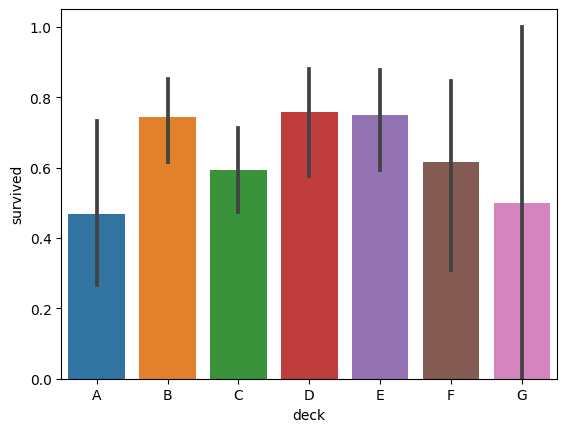

In [ ]:
#Example hypothesis: maybe the people on the upper decks were more likely to survive!
#(For reference, the decks are ordered in alphabetical order, so deck A was at the top, and G at the bottom of the ship).
sns.barplot(data=titanic, x = 'deck', y = "survived")

As we can see, it seems like there is not much of a correlation between the deck and the survival rate! (In case you are curious, the column "deck" is actually missing a lot of entries. You can confirm this by running::
 titanic.isna().sum()

 So, just in the case of using the deck, the database is not really reliable.)

In [4]:
#Work on your hypothesis 1 here
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
titanic = sns.load_dataset('titanic')
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
titanic = sns.load_dataset('titanic')
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic = sns.load_dataset('titanic')
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
#maybe the women were more likely to survive

<Axes: xlabel='sex', ylabel='survived'>

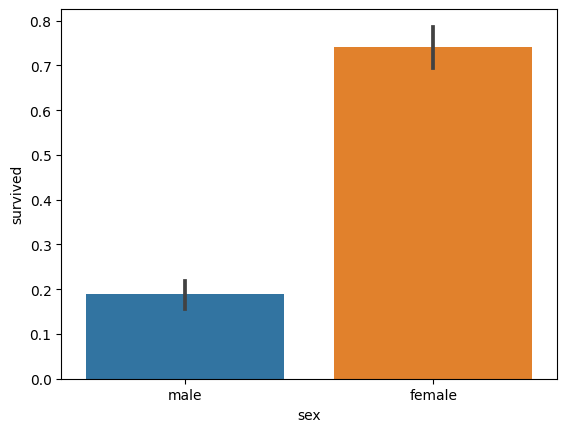

In [ ]:
sns.barplot(data=titanic, x = 'sex', y = "survived")

In [ ]:
from numpy import round_
survived_percentage = titanic.groupby('sex')['survived'].mean() * 100
print(round(survived_percentage))

sex
female    74.0
male      19.0
Name: survived, dtype: float64


Upon initial inspection of the dataset, I noticed that there were more women among the survivors. Therefore, I decided to investigate the relationship between these two variables. The query for missing gender values resulted in zero, so this dataset can be considered reliable. Data exploration revealed that the number of survivors might indeed be dependent on gender, as the survival rate for men is 19%, while for women, it's 74%. The remaining 7% of data is likely missing. The chart shows the dependence of survival on gender. This is probably due to men being engaged in ship assistance, while women had priority for rescue on lifeboats.

In [ ]:
#Work on your hypothesis 2 here.
# There were more children survivors than adults.
# I would like to investigate the relationship between survival, gender, and age category (adult or not).

In [12]:
import matplotlib.pyplot as plt

titanic['adult'] = titanic['age'] >= 18
survived_percentage = titanic.groupby(['sex', 'adult'])['survived'].mean() * 100
print(round(survived_percentage))


sex     adult
female  False    69.0
        True     77.0
male    False    21.0
        True     18.0
Name: survived, dtype: float64


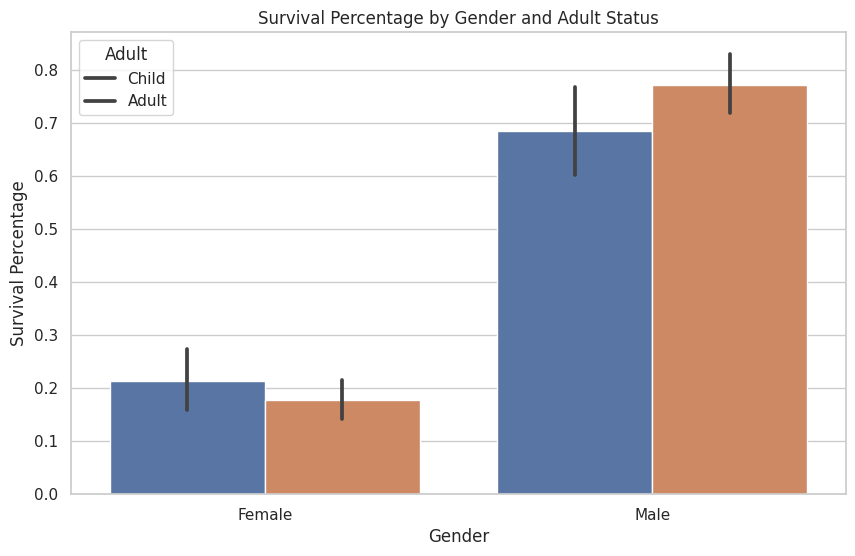

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="sex", y="survived", hue="adult", data=titanic)
#sns.catplot(data =titanic, x="adult", y="survived", col="sex", kind="bar", height=4, aspect=.6,)
plt.title("Survival Percentage by Gender and Adult Status")
plt.ylabel("Survival Percentage")
plt.xlabel("Gender")
plt.xticks([0, 1], ["Female", "Male"])
plt.legend(title="Adult", labels=["Child", "Adult"])
plt.show()

We can see that the theory that there were more children survivors than adults doesn't hold true. This relationship doesn't provide us with meaningful insights, possibly because there are many missing data points in the age column.

In [ ]:
#Work on your hypothesis 3 here
#Dependency of survival on whether passengers were traveling alone (without family) or with family members

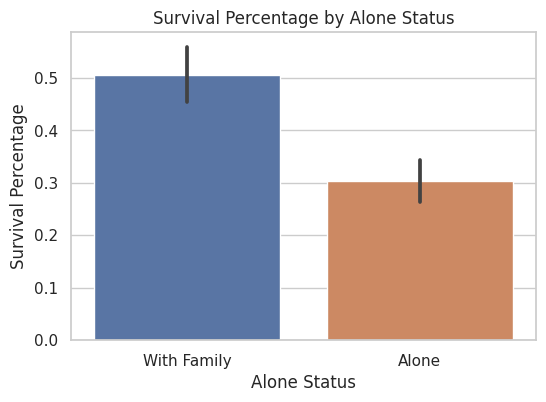

In [ ]:
titanic['alone'] = (titanic['sibsp'] == 0) & (titanic['parch'] == 0)
survived_percentage = titanic.groupby('alone')['survived'].mean() * 100
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x="alone", y="survived", data=titanic)
plt.title("Survival Percentage by Alone Status")
plt.ylabel("Survival Percentage")
plt.xlabel("Alone Status")
plt.xticks([0, 1], ["With Family", "Alone"])
plt.show()

We can see that indeed more passengers with family members survived compared to those who were traveling alone. In the data, there are no missing values in the column related to being alone or not. This makes the dataset more reliable for analysis. In this case, they can confidently use this variable to analyze the impact of “aloneness” on survival on the Titanic.
The reason why having a family matters in survival may give the following. It's possible that, as the tragedy occurred at night, solitary individuals were deeply asleep, and there was no one to wake them up, therefore they reacted to the situation later than others. Additionally, it's possible that a person facing death all alone may have been more disoriented compared to those with loved ones to protect, which might have encouraged them to gather their strength and thoughts.